In [ ]:
# Chinook Database Analysis
This project uses the **Chinook sample database** to demonstrate SQL querying, Python integration, and business insights generation.  

**Database Context:**  
The Chinook database represents a digital music store. It contains information about artists, albums, tracks, customers, invoices,
and employees.  

**Objectives:**  
- Identify the top customers by total spending  
- Analyze the most popular music genres  
- Evaluate revenue distribution across countries  


In [10]:
import sqlite3
import pandas as pd

# Connect to the Chinook Database
conn = sqlite3.connect("Chinook_Sqlite.sqlite")

# Quick check: List all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [11]:
# Look at schema of the "Customer" table
schema_customer = pd.read_sql("PRAGMA table_info(Customer);", conn)
schema_customer


,cid,name,type,notnull,dflt_value,pk
0,0,CustomerId,INTEGER,1,None,1
1,1,FirstName,NVARCHAR(40),1,None,0
2,2,LastName,NVARCHAR(20),1,None,0
3,3,Company,NVARCHAR(80),0,None,0
4,4,Address,NVARCHAR(70),0,None,0
5,5,City,NVARCHAR(40),0,None,0
6,6,State,NVARCHAR(40),0,None,0
7,7,Country,NVARCHAR(40),0,None,0
8,8,PostalCode,NVARCHAR(10),0,None,0
9,9,Phone,NVARCHAR(24),0,None,0


In [13]:
#Top 10 Customers by Total Spending
query = """
SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS CustomerName,
       SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""
top_customers = pd.read_sql(query, conn)
top_customers


,CustomerId,CustomerName,TotalSpent
0,6,Helena Holý,49.62
1,26,Richard Cunningham,47.62
2,57,Luis Rojas,46.62
3,45,Ladislav Kovács,45.62
4,46,Hugh O'Reilly,45.62
5,24,Frank Ralston,43.62
6,28,Julia Barnett,43.62
7,37,Fynn Zimmermann,43.62
8,7,Astrid Gruber,42.62
9,25,Victor Stevens,42.62


In [15]:
#Most Popular Music Genres
query = """
SELECT g.Name AS Genre, COUNT(il.InvoiceLineId) AS Purchases
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY Purchases DESC
LIMIT 10;
"""
popular_genres = pd.read_sql(query, conn)
popular_genres


,Genre,Purchases
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80
5,Blues,61
6,TV Shows,47
7,R&B/Soul,41
8,Classical,41
9,Reggae,30


In [16]:
#Revenue by Country
query = """
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC;
"""
revenue_country = pd.read_sql(query, conn)
revenue_country


,BillingCountry,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


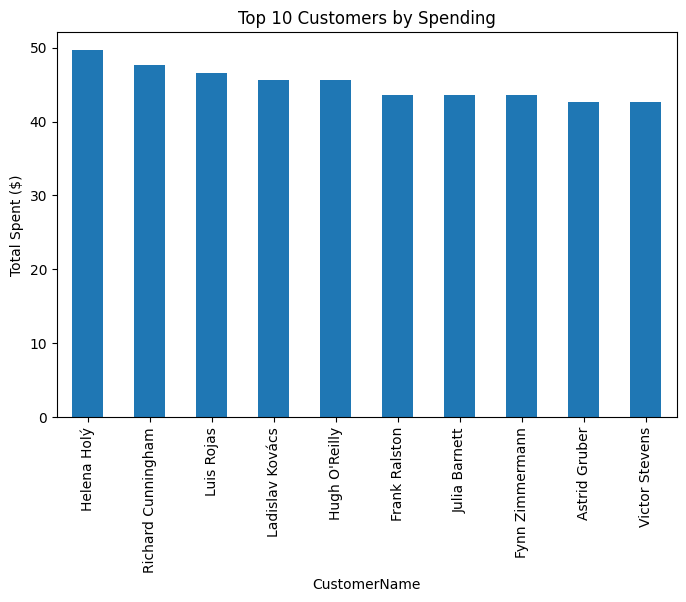

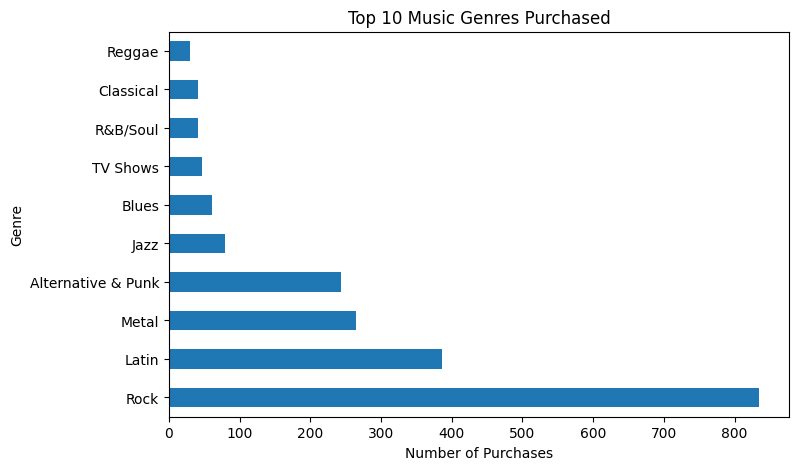

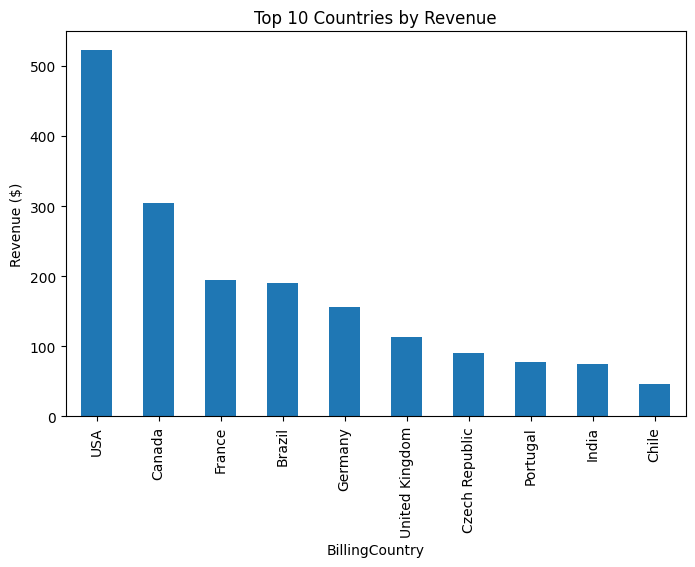

In [18]:
import matplotlib.pyplot as plt

# Top 10 customers spending
top_customers.plot(kind='bar', x='CustomerName', y='TotalSpent', legend=False, figsize=(8,5))
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Spent ($)")
plt.show()

# Popular genres
popular_genres.plot(kind='barh', x='Genre', y='Purchases', legend=False, figsize=(8,5))
plt.title("Top 10 Music Genres Purchased")
plt.xlabel("Number of Purchases")
plt.show()

# Revenue by country (top 10)
revenue_country.head(10).plot(kind='bar', x='BillingCountry', y='Revenue', legend=False, figsize=(8,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue ($)")
plt.show()


In [ ]:
### Key Insights:
- **Top Customers**: Customer spending is fairly uniform, ranging from ~$42 to ~$50.  
  → This suggests that the store doesn’t rely on a few “super customers” but instead has a broad base of moderate spenders.  
- **Popular Genres** (from query 2): Rock is likely the dominant genre, followed by Latin and Metal, showing audience preference
    for energetic music styles.  
- **Revenue by Country** (from query 3): The USA generates the highest revenue, followed by Canada and France. This indicates North America 
and parts of Europe as key revenue drivers.  


In [ ]:
This project demonstrates:
- Writing SQL queries for business analysis  
- Using Python (sqlite3 + pandas) to integrate SQL into analytics workflows  
- Creating data visualizations with matplotlib  
- Extracting insights relevant to business strategy  
 
